# Howland Lab 
First notebook for investigating NREL wind data source

### Data Download


#### Downloading/Processing India field data
Reading raw matlab data

In [1]:
import pandas as pd
import os
from datetime import datetime, date, time
from matplotlib import pyplot as plt
from scipy.io import loadmat
import numpy as np

In [2]:
def get_field_data(filepath=r"../data/AllData_NP_corrected.mat", spec_sets=None):
    """
    Gets field data organized into pd.DataFrames() with the following columns: ["DateTime", "AmbientTemperature", "Pressure", "RelHumidity", "Veer", "Shear",]
    param filepath : str : filepath to matlab file with field data
    param spec_sets : [str] : list of specific turbines/dataset to return, i.e. spec_sets = ["BHR01", "BHR02", "Lidar"]

    returns [pd.DataFrame()] : dataframes corresponding to all or specified dataset from matlab file
    """
    # open matlab file
    try:
        india_data_mat = loadmat(filepath)
        india_data_mat["AllData"].dtype, india_data_mat["AllData"][0].shape, india_data_mat["AllData"][0]
    except KeyError as e:
        raise(e, "Ensure that the matlab file is correct data file.")

    # list out all datasets within the matlab file
    india_data_mat_dtype = india_data_mat["AllData"].dtype
    ndata = {n: india_data_mat["AllData"][n][0, 0] for n in india_data_mat_dtype.names}

    # define datetime column as index for all dataframes
    index_ts = ndata['DateTime'][0]

    data_sets = [n for n, v in ndata.items()]
    if spec_sets != None:
        data_sets = spec_sets
    
    # store list of ouput dataframes
    out = {}
    for set in data_sets:
        # sub fields corresponding to each dataset
        if str(type(ndata[set].dtype)) != "<class 'numpy.dtype[float64]'>":
            fields = list(ndata[set].dtype.fields.keys())
            try : 
                # Lidar has sub datasets for measurement heights - unsure how to grab these
                if set == "Lidar":
                    fields = fields[:5]
                # create df of dataset
                df = pd.DataFrame(np.concatenate([ndata[set][0][0][field] for field in fields], axis=0).T,
                        index=index_ts,
                        columns=fields)

                out[set]= df
            except:
                print(f"Error: not able to create dataframe for set {set}")
                continue

    return out

In [3]:
out = get_field_data()
out.keys

<function dict.keys>

In [4]:
from datetime import datetime
from datetime import timedelta

def datenum_to_datetime(datenum):
    """
    Source: https://gist.github.com/victorkristof/b9d794fe1ed12e708b9d#file-datenum-to-datetime-py 
    Convert Matlab datenum into Python datetime.
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum.
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    return datetime.fromordinal(int(datenum)) \
           + timedelta(days=int(days)) \
           + timedelta(hours=int(hours)) \
           + timedelta(minutes=int(minutes)) \
           + timedelta(seconds=round(seconds)) \
           - timedelta(days=366)

In [18]:
out["BHR58"]

,Available,AirDensity,AmbientTemperature,GeneratorSpeed,NacellePosition,OpSt,Pitch,TurbulenceIntensity,RelWndDir,Power,WndSpd,WFCErrorCode,WFCStrategy,YawOffsetApplied,YawOffsetSetPoint,NacellePosition_corrected
737825.771528,1.0,1.173125,23.184921,1049.852459,228.0,5.0,1.680039,14.168282,-4.430492,130.437705,3.617077,120.0,0.0,0.0,0.0,203.7
737825.772222,1.0,1.173190,23.156068,1049.959016,228.0,5.0,1.785424,14.175444,2.149563,121.419673,3.547950,120.0,0.0,0.0,0.0,203.7
737825.772917,1.0,1.173237,23.128196,1050.029505,228.0,5.0,1.786719,13.202886,-2.633825,124.078689,3.570445,120.0,0.0,0.0,0.0,203.7
737825.773611,1.0,1.173307,23.111354,1049.901637,228.0,5.0,1.796261,10.599141,-1.487978,116.580328,3.508430,120.0,0.0,0.0,0.0,203.7
737825.774306,1.0,1.173365,23.104430,1050.344268,228.0,5.0,1.780472,9.970063,-5.336175,136.136065,3.637560,120.0,0.0,0.0,0.0,203.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737897.372222,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737897.372917,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737897.373611,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737897.374306,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data_keys = ["BHR58", "BHR59", "BHR62", "Lidar"]
for k in data_keys:
    data_df = out[k].dropna().reset_index()
    print(data_df.columns)
    data_df["DateTime"] = data_df["index"].apply(datenum_to_datetime)
    data_df["t"] = (data_df.DateTime - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
    data_df.to_csv(f"../data/Field data/{k}.csv")

Index(['index', 'Available', 'AirDensity', 'AmbientTemperature',
       'GeneratorSpeed', 'NacellePosition', 'OpSt', 'Pitch',
       'TurbulenceIntensity', 'RelWndDir', 'Power', 'WndSpd', 'WFCErrorCode',
       'WFCStrategy', 'YawOffsetApplied', 'YawOffsetSetPoint',
       'NacellePosition_corrected'],
      dtype='object')
Index(['index', 'Available', 'AirDensity', 'AmbientTemperature',
       'GeneratorSpeed', 'NacellePosition', 'OpSt', 'Pitch',
       'TurbulenceIntensity', 'RelWndDir', 'Power', 'WndSpd', 'WFCErrorCode',
       'WFCStrategy', 'YawOffsetApplied', 'YawOffsetSetPoint',
       'NacellePosition_corrected'],
      dtype='object')
Index(['index', 'Available', 'AirDensity', 'AmbientTemperature',
       'GeneratorSpeed', 'NacellePosition', 'OpSt', 'Pitch',
       'TurbulenceIntensity', 'RelWndDir', 'Power', 'WndSpd', 'WFCErrorCode',
       'WFCStrategy', 'YawOffsetApplied', 'YawOffsetSetPoint',
       'NacellePosition_corrected'],
      dtype='object')
Index(['index', 'Ambie

In [3]:
def plot_field_data(field_data, spec_sets=None):
    ''' 
    Visualizes field data in plots
    param field_data : dict{str : pd.DataFrame} : dictionary mapping dataset name to dataframe of data
    param spec_sets : [str] : list of specific turbines/dataset to return, i.e. spec_sets = ["BHR01", "BHR02", "Lidar"]

    returns None
    '''
    temporal_param = ["DateTime"]

    data_sets = [n for n, v in field_data.items()]
    if spec_sets != None:
        data_sets = spec_sets

    for set in data_sets:
        data_df = field_data[set]
        for col in data_df.columns:
            plot = plt.plot(data_df.index, data_df[col])
            plt.xlabel('DateTime')
            plt.ylabel(col)
            plt.title(f"Field Data India Wind Farm {set}\n{col}")
            plt.show()
        break

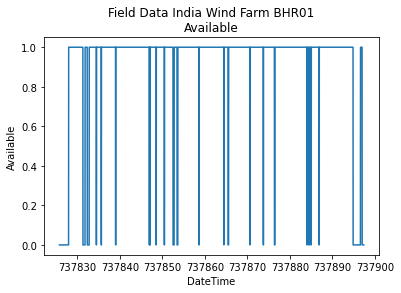

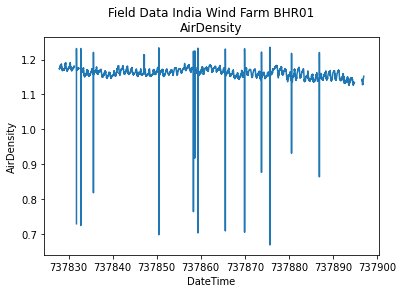

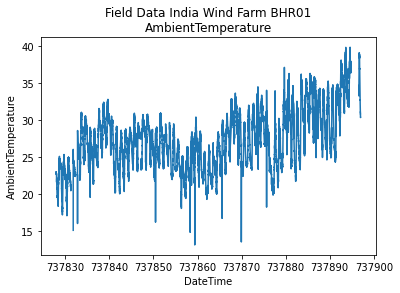

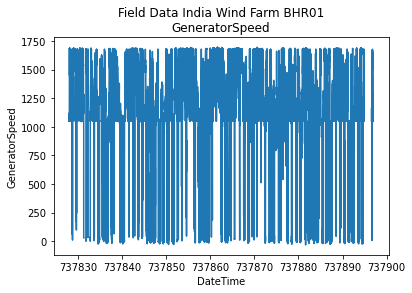

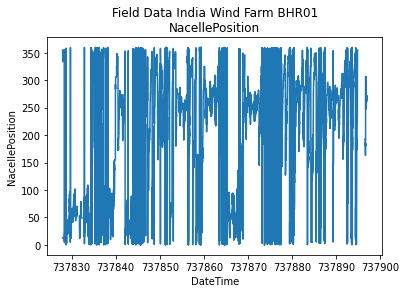

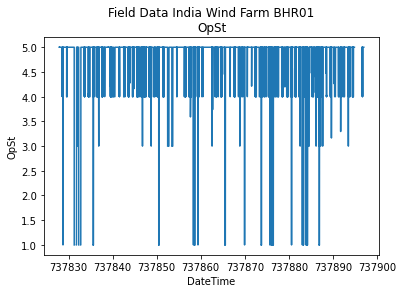

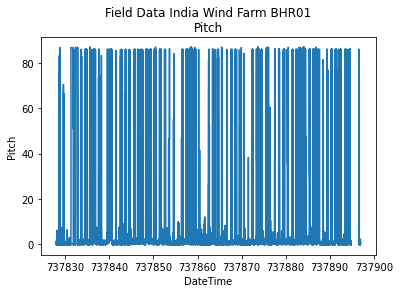

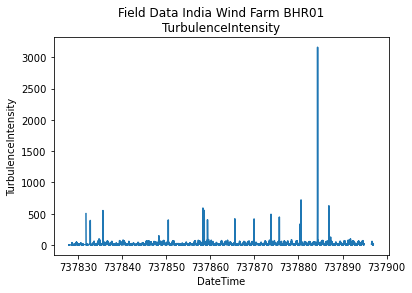

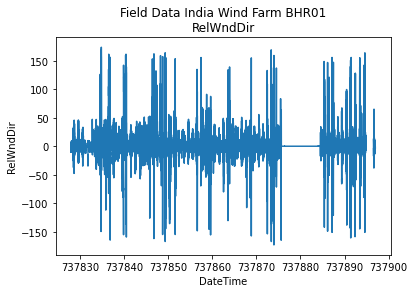

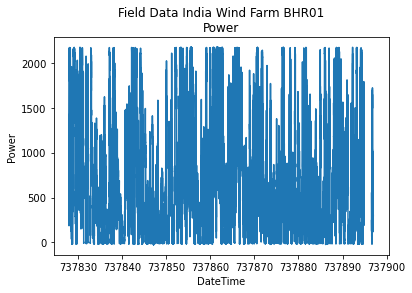

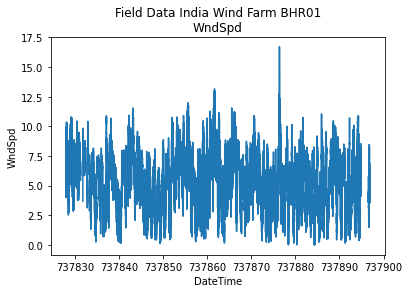

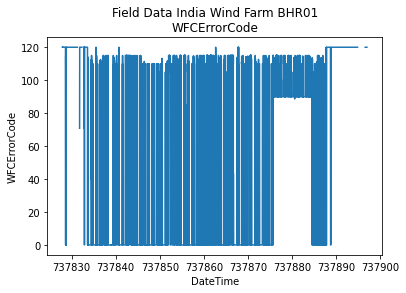

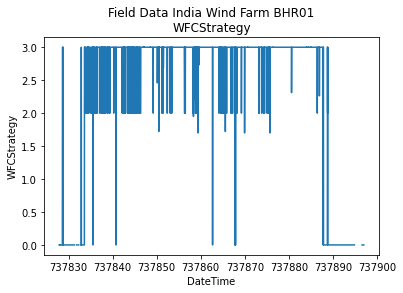

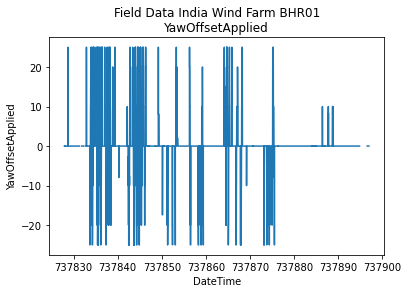

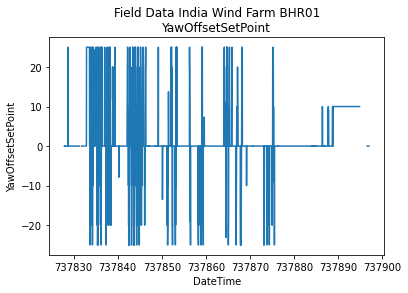

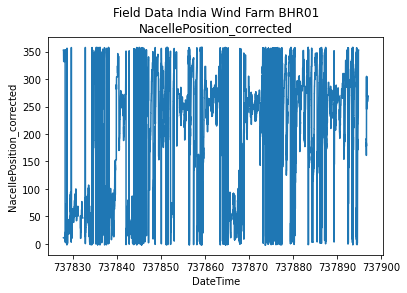

In [4]:
field_data_sets = get_field_data()
plot_field_data(field_data=field_data_sets)

#### Downloading NREL Wind Toolkit Datasets
Making requests to API

In [21]:
import requests

def get_nrel_data(data_set_url, parameters, file_format="json"):
    '''
    Serves to make get requests to the NREL Wind Toolkit API (documentaion example: https://developer.nrel.gov/docs/wind/wind-toolkit/india-wind-download/#request-parameters)
    param data_set_url : type str : NREL API url for specific dataset to download 
                    (without '.fomat' suffix), ex: /api/wind-toolkit/v2/wind/india-wind-download
    param parameters : type dict : required parameters specific to dataset API call
    param file_format : type str : type of file to store data in (will be received to the email provided in API call) - acfiallo@mit.edu

    return response from API request
    '''
    # define user NREL credentials (API key and email)
    api_key = "Rb6dZe65LDadxSEK0NOXlGYymXWY1RtkSqiZsLYv"
    email = "acfiallo@mit.edu"

    # make get request to NREL API
    base_url = "http://developer.nrel.gov"
    data_query = f"{data_set_url}.{file_format}?api_key={api_key}&email={email}"
    response = requests.request("GET",url=base_url+data_query, params=parameters)

    return response

In [22]:
india_wind_url = "/api/wind-toolkit/v2/wind/india-wind-download"
file_format = "json"

attributes = ['pressure_40m',
        'temperature_100m',
        "temperature_120m",
        "temperature_40m",
        "temperature_80m",
        "winddirection_100m",
        "winddirection_120m",
        "winddirection_40m",
        "winddirection_80m",
        "windspeed_100m",
        "windspeed_120m",
        "windspeed_40m",
        "windspeed_80m",
        "pressure_100m"]

parameters = {
    'wkt' : 'POINT(75.36621 24.726874)',
    'names' : [
        2014
    ],
    'interval' : 5,
}

In [23]:
for att in attributes:
    parameters["attributes"] = [att]
    print("params: ", parameters)
    india_wind_data_json = get_nrel_data(india_wind_url, parameters, file_format)
    
    print(india_wind_data_json.url)
    print(india_wind_data_json.text)
    print("-------------------")

params:  {'wkt': 'POINT(75.36621 24.726874)', 'names': [2014], 'interval': 5, 'attributes': ['pressure_40m']}
https://developer.nrel.gov/api/wind-toolkit/v2/wind/india-wind-download.json?api_key=Rb6dZe65LDadxSEK0NOXlGYymXWY1RtkSqiZsLYv&email=acfiallo@mit.edu&wkt=POINT%2875.36621+24.726874%29&names=2014&interval=5&attributes=pressure_40m
{"inputs":{"body":{},"params":{},"query":{"email":"acfiallo@mit.edu","wkt":"POINT(75.36621 24.726874)","names":"2014","interval":"5","attributes":"pressure_40m"}},"metadata":{"version":"2.0.0","resultset":{"count":1}},"status":200,"outputs":{"message":"File generation in progress. An email will be sent to acfiallo@mit.edu when the download is ready.","downloadUrl":"https://mapfiles.nrel.gov/data/wind/c4e1d2fbcb8bb1c93a6f5d4a3e8ec45e.zip"},"errors":[]}
-------------------
params:  {'wkt': 'POINT(75.36621 24.726874)', 'names': [2014], 'interval': 5, 'attributes': ['temperature_100m']}
https://developer.nrel.gov/api/wind-toolkit/v2/wind/india-wind-download

### Reviewing downloaded datasets

In [24]:
# concatenating all the NREL India dataset files 
# each file contains a different measured data column (wasn't able to download all together due to error)
def concatentate_nrel_data():
    data_folder = "data/NREL data - 5min"
    data_filenames = os.listdir(data_folder)
    header_row = 3

    # read first file path to get base pd.Dataframe
    first_filepath = f"{data_folder}/{data_filenames[0]}"
    all_india_data_df = pd.read_csv(first_filepath, header=header_row)

    # merge all the next csv files together
    for filename in data_filenames[1:]:
        if filename != "all_NREL_india_wind_data_2014.csv":
            data_df = pd.read_csv(f"{data_folder}/{filename}", header=header_row)
            all_india_data_df = pd.merge(left=all_india_data_df, right=data_df)
    
    # all_india_data_df["t"] = pd.to_datetime(all_india_data_df[all_india_data_df.Year, all_india_data_df.Month, all_india_data_df.Day])
    all_india_data_df["Date"] = all_india_data_df.Year.astype(str) + "-" + all_india_data_df.Month.astype(str) + "-" + all_india_data_df.Day.astype(str)
    all_india_data_df["Time"] = all_india_data_df.Hour.astype(str) + ":" + all_india_data_df.Minute.astype(str)
    all_india_data_df["DateTime"] = pd.to_datetime(all_india_data_df.Date + " " + all_india_data_df.Time + ":00")
    # convert datetime index to epoch index
    all_india_data_df["t"] = (all_india_data_df.DateTime - pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
    
    # save data to NREL data folder
    all_india_data_df.to_csv(f"{data_folder}/all_NREL_india_wind_data_2014.csv")

    return all_india_data_df
    

In [25]:
# visualize time series
def plot_data(data_df):
    temporal_params = ["Year", "Month", "Day", "Hour", "Minute", "Date", "Time", "t"]

    for col in data_df.columns[1:]:
        if col not in temporal_params:
            print(f"plotting {col}")
            plot = plt.plot(data_df.DateTime, data_df[col])
            plt.xlabel('Time')
            plt.ylabel(col)
            plt.title("India Wind Farm Data [2014]")
            plt.show()
    

In [26]:
all_india_data_df = concatentate_nrel_data()
all_india_data_df

,Year,Month,Day,Hour,Minute,wind direction at 120m (deg),temperature at 40m (C),temperature at 120m (C),temperature at 80m (C),wind speed at 120m (m/s),air pressure at 40m (Pa),wind speed at 80m (m/s),air pressure at 100m (Pa),wind direction at 80m (deg),temperature at 100m (C),Date,Time,DateTime,t
0,2014,1,1,0,0,68.84,12.00,12.23,12.16,4.82,97370,3.76,96670,62.14,12.20,2014-1-1,0:0,2014-01-01 00:00:00,1388534400
1,2014,1,1,0,5,68.36,11.97,12.20,12.14,4.79,97370,3.76,96670,61.31,12.17,2014-1-1,0:5,2014-01-01 00:05:00,1388534700
2,2014,1,1,0,10,67.97,11.93,12.16,12.11,4.77,97370,3.76,96670,60.62,12.14,2014-1-1,0:10,2014-01-01 00:10:00,1388535000
3,2014,1,1,0,15,67.71,11.89,12.13,12.08,4.75,97370,3.77,96680,60.14,12.11,2014-1-1,0:15,2014-01-01 00:15:00,1388535300
4,2014,1,1,0,20,67.52,11.85,12.09,12.05,4.74,97370,3.78,96670,59.77,12.07,2014-1-1,0:20,2014-01-01 00:20:00,1388535600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2014,12,31,23,35,73.47,12.42,13.74,13.37,2.31,96710,1.59,96030,44.55,13.58,2014-12-31,23:35,2014-12-31 23:35:00,1420068900
105116,2014,12,31,23,40,72.45,12.34,13.68,13.30,2.17,96720,1.51,96030,41.05,13.52,2014-12-31,23:40,2014-12-31 23:40:00,1420069200
105117,2014,12,31,23,45,71.08,12.26,13.62,13.24,2.06,96720,1.46,96030,36.84,13.46,2014-12-31,23:45,2014-12-31 23:45:00,1420069500
105118,2014,12,31,23,50,69.95,12.19,13.58,13.18,1.99,96720,1.45,96030,33.19,13.41,2014-12-31,23:50,2014-12-31 23:50:00,1420069800


plotting wind direction at 40m (deg)


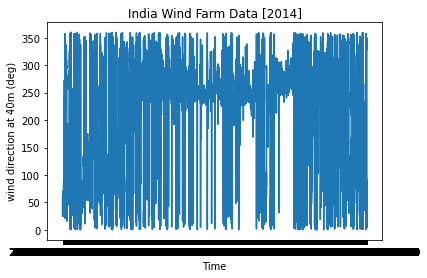

plotting wind direction at 100m (deg)


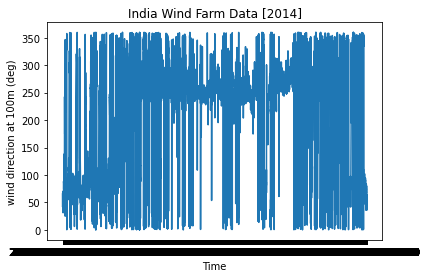

plotting temperature at 120m (C)


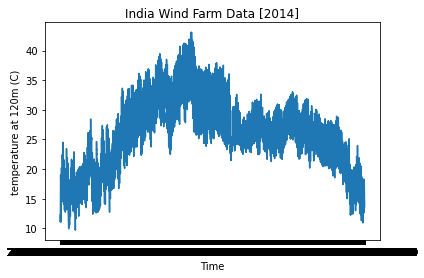

plotting air pressure at 40m (Pa)


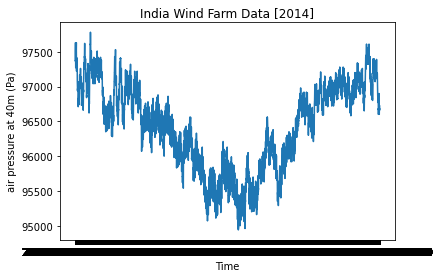

plotting temperature at 40m (C)


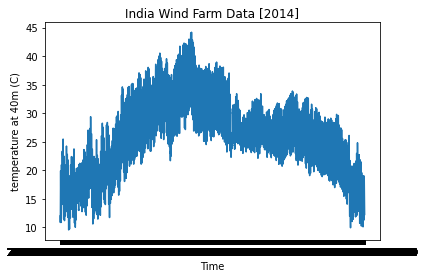

plotting air pressure at 100m (Pa)


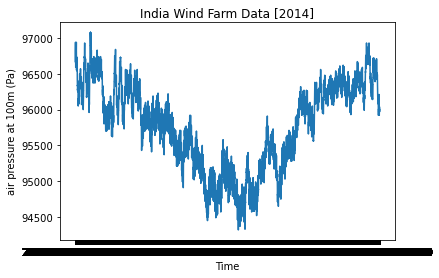

plotting wind speed at 80m (m/s)


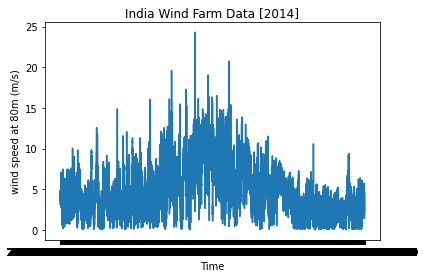

plotting DateTime


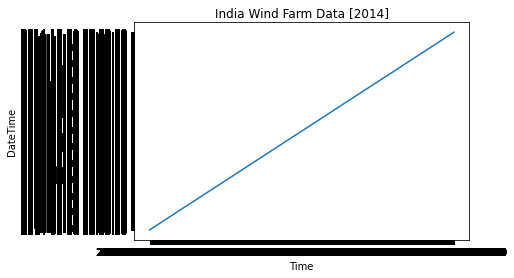

In [19]:
all_india_data_df = pd.read_csv("data/NREL data/all_NREL_india_wind_data_2014.csv")
plot_data(all_india_data_df)

### Replicating the Wind Direction Forecast Algorithm
From Howland et al.: Closed-loop wake steering: Diurnal cycle ABL



![Algorithm diagram](alg-pseudo-diagram.png)

#### Linear Ridge / Lasso Regression approach

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

First process the data into its training, testing and validation sets

![data process](alg-data-processing.png)

In [33]:
# parse data set into t_1 (past), t_2 (present), t_3 (future)
meters = 40 # deinfe where to use wind dir measurements from either 40, 100 m above ground
T = 15 * 60 # 15 minutes in seconds

In [34]:
def parse_data(data_df, T, x_features=["t"]):
    parse_model_data = pd.DataFrame()

    for x_ft in x_features:
        # past time and wind direction goes from t_initial -> t_final - 2T
        parse_model_data[f"{x_ft}1"] = data_df[x_ft][:-2*T]
        parse_model_data["e_t1"] = data_df[f"wind direction at {meters}m (deg)"][:-2*T]

        # present time and wind direction goes from t_initial + T -> t_final - T
        parse_model_data[f"{x_ft}2"] = data_df[x_ft][T:-T]
        parse_model_data["e_t2"] = data_df[f"wind direction at {meters}m (deg)"][T:-T]

        # future time and wind direction goes from t_0 + 2T -> t_final
        parse_model_data[f"{x_ft}3"] = data_df[x_ft][2*T:]
        parse_model_data["e_t3"] = data_df[f"wind direction at {meters}m (deg)"][2*T:]

    return parse_model_data

In [35]:
x_features = ["t", "temperature at 120m (C)", "air pressure at 40m (Pa)", "wind speed at 80m (m/s)"]
parsed_model_data = parse_data(all_india_data_df, T, x_features)
parsed_model_data

,t1,e_t1,t2,e_t2,t3,e_t3,temperature at 120m (C)1,temperature at 120m (C)2,temperature at 120m (C)3,air pressure at 40m (Pa)1,air pressure at 40m (Pa)2,air pressure at 40m (Pa)3,wind speed at 80m (m/s)1,wind speed at 80m (m/s)2,wind speed at 80m (m/s)3
0,1388534400000000000,61.15,NaN,NaN,NaN,NaN,12.23,NaN,NaN,97370,NaN,NaN,3.76,NaN,NaN
1,1388535300000000000,56.90,NaN,NaN,NaN,NaN,12.13,NaN,NaN,97370,NaN,NaN,3.77,NaN,NaN
2,1388536200000000000,54.70,NaN,NaN,NaN,NaN,12.02,NaN,NaN,97370,NaN,NaN,3.77,NaN,NaN
3,1388537100000000000,51.25,NaN,NaN,NaN,NaN,11.90,NaN,NaN,97380,NaN,NaN,3.74,NaN,NaN
4,1388538000000000000,48.28,NaN,NaN,NaN,NaN,11.76,NaN,NaN,97390,NaN,NaN,3.73,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33235,1418445900000000000,230.09,1.418446e+18,230.09,1.418446e+18,230.09,21.29,21.29,21.29,96880,96880.0,96880.0,2.50,2.50,2.50
33236,1418446800000000000,233.17,1.418447e+18,233.17,1.418447e+18,233.17,21.93,21.93,21.93,96880,96880.0,96880.0,2.82,2.82,2.82
33237,1418447700000000000,231.69,1.418448e+18,231.69,1.418448e+18,231.69,22.38,22.38,22.38,96880,96880.0,96880.0,3.03,3.03,3.03
33238,1418448600000000000,227.42,1.418449e+18,227.42,1.418449e+18,227.42,22.62,22.62,22.62,96880,96880.0,96880.0,3.24,3.24,3.24


In [37]:
# parsing x, y train, test and validation sets
x_features_123 = [ft+str(i) for i in range(1,4) for ft in x_features]
# get x training and testing data corresponding to x_feature column
X_train, X_test, X_val = parsed_model_data[x_features_123].dropna().to_numpy(), parsed_model_data[x_features_123].dropna().to_numpy(), parsed_model_data[x_features_123].dropna().to_numpy()
X_train, X_test, X_val

(array([[1.3901544e+18, 1.5260000e+01, 9.7480000e+04, ..., 1.5260000e+01,
         9.7480000e+04, 3.2200000e+00],
        [1.3901553e+18, 1.5290000e+01, 9.7480000e+04, ..., 1.5290000e+01,
         9.7480000e+04, 3.2700000e+00],
        [1.3901562e+18, 1.5290000e+01, 9.7480000e+04, ..., 1.5290000e+01,
         9.7480000e+04, 3.2400000e+00],
        ...,
        [1.4184477e+18, 2.2380000e+01, 9.6880000e+04, ..., 2.2380000e+01,
         9.6880000e+04, 3.0300000e+00],
        [1.4184486e+18, 2.2620000e+01, 9.6880000e+04, ..., 2.2620000e+01,
         9.6880000e+04, 3.2400000e+00],
        [1.4184495e+18, 2.2730000e+01, 9.6880000e+04, ..., 2.2730000e+01,
         9.6880000e+04, 3.4100000e+00]]),
 array([[1.3901544e+18, 1.5260000e+01, 9.7480000e+04, ..., 1.5260000e+01,
         9.7480000e+04, 3.2200000e+00],
        [1.3901553e+18, 1.5290000e+01, 9.7480000e+04, ..., 1.5290000e+01,
         9.7480000e+04, 3.2700000e+00],
        [1.3901562e+18, 1.5290000e+01, 9.7480000e+04, ..., 1.5290000e+01,

In [38]:
# get x training and testing data corresponding to x_feature column
y_train, y_test, y_val = parsed_model_data[["e_t1"]].dropna().to_numpy(), parsed_model_data[["e_t2"]].dropna().to_numpy(), parsed_model_data[["e_t3"]].dropna().to_numpy()
y_train, y_test, y_val

(array([[ 61.15],
        [ 56.9 ],
        [ 54.7 ],
        ...,
        [231.69],
        [227.42],
        [225.4 ]]),
 array([[101.1 ],
        [105.57],
        [117.8 ],
        ...,
        [231.69],
        [227.42],
        [225.4 ]]),
 array([[ 81.33],
        [ 83.09],
        [ 86.59],
        ...,
        [231.69],
        [227.42],
        [225.4 ]]))

In [148]:
from sklearn.linear_model import Ridge, Lasso

def regression_direction_estimation(data_df, model_type, x_feature="t"):
    '''
    x_feature : str : column name to use as model inputs {}
    model_type : str : {'Lasso', 'Ridge'}
    '''
    # get x training and testing data corresponding to x_feature column
    X_train, X_val, X_test = data_df[["e_t1"]].dropna().to_numpy(), data_df[["e_t2"]].dropna().to_numpy()
    if x_feature:
        X_train, X_val, X_test = data_df[[x_feature+"1", "e_t1"]].dropna().to_numpy(), data_df[[x_feature+"2", "e_t2"]].dropna().to_numpy(), data_df[[x_feature+"3"]].dropna().to_numpy()

    # get x training and testing data corresponding to x_feature column
    y_train, y_val = data_df[["e_t2"]].dropna().to_numpy(), data_df[["e_t3"]].dropna().to_numpy()

    # standardize training and testing data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.fit_transform(X_val)
    y_train = scaler.fit_transform(y_train)
    y_val = scaler.fit_transform(y_val)

    train_mse = list()
    val_mse = list()
    coeffs = list()

    # initialize set of lambdas to conduct grid search over
    lambdas = np.logspace(-1,9,100)
    print(X_train.shape)
    min_shape = min(X_train.shape[0], X_val.shape[0], y_train.shape[0], y_val.shape[0])
    for lam in lambdas:
        ## Lasso Regression
        if model_type == "Lasso":
            # train lasso model
            model = Lasso(alpha=lam).fit(X_train[:min_shape], y_train[:min_shape])
        
        ## Ridge Regression
        elif model_type == "Ridge":
            model = Ridge(alpha=lam).fit(X_train[:min_shape], y_train[:min_shape])
        
        # compute lasso train and test errors
        train_mse.append(np.mean((y_train[:min_shape] - model.predict(X_train[:min_shape]))**2))
        val_mse.append(np.mean((y_val[:min_shape] - model.predict(X_val[:min_shape]))**2))
        coeffs.append(model.coef_[0])
        
    return lambdas, train_mse, val_mse, coeffs

In [153]:
def plot_mse_coeff(data_df, model_type, x_features=["t"]):

    # create regression and plot MSEs
    lambdas, train_mse, test_mse, coeffs = regression_direction_estimation(data_df, model_type)
    plt.plot(lambdas, train_mse, label="Train MSE",)
    plt.plot(lambdas, test_mse, label="Test MSE", linestyle='--')

    # create MSE plot axes and labels
    plt.title(model_type + " Regression Lambda Grid Search: MSE")
    plt.xscale('log')
    plt.xlabel("lambda")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

    # plot labeled coefficients
    plt.plot(lambdas, coeffs, label="Coef.",)
    
    # create plot axes
    plt.title(model_type + " Regression Lambda Grid Search: Coefficients")
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    plt.legend()
    plt.show()


In [154]:
def plot_mse_coeffs(data_df, model_type, x_features=["t"]):
    # color code each feature x saleprice regression
    colors = ['red', 'blue', 'orange', 'green', 'grey']
    # store all models' MSEs and coefficients to plot later
    all_train_mses = []
    all_test_mses = []
    all_coeffs = []

    # create regression for each feature and plot MSEs
    for i in range(len(x_features)):
        col =  x_features[i]
        print(f"Modeling {col}")
        lambdas, train_mse, test_mse, coeffs = regression_direction_estimation(data_df, model_type, x_feature=col)
        color = colors[i]
        plt.plot(lambdas, train_mse, label= col +" Train MSE", color=color)
        plt.plot(lambdas, test_mse, label= col + " Test MSE", color=color, linestyle='--')
        all_train_mses.append(train_mse)
        all_test_mses.append(test_mse)
        all_coeffs.append(coeffs)

    # create MSE plot axes and labels
    plt.title(model_type + " Regression Lambda Grid Search: MSE")
    plt.xscale('log')
    plt.xlabel("lambda")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

    # plot labeled coefficients
    for i in range(len(x_features)):
        col =  x_features[i]
        color = colors[i]
        plt.plot(lambdas, all_coeffs[i], label=col + " Coef.", color=color)
    
    # create plot axes
    plt.title(model_type + " Regression Lambda Grid Search: Coefficients")
    plt.xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    plt.legend()
    plt.show()

    return {'lambdas': lambdas, 
            'all_train_mses': all_train_mses, 
            'all_test_mses': all_test_mses, 
            'all_coeffs': all_coeffs}


In [155]:
regression_direction_estimation(parsed_model_data, model_type="Ridge")

(33240, 2)


(array([1.00000000e-01, 1.26185688e-01, 1.59228279e-01, 2.00923300e-01,
        2.53536449e-01, 3.19926714e-01, 4.03701726e-01, 5.09413801e-01,
        6.42807312e-01, 8.11130831e-01, 1.02353102e+00, 1.29154967e+00,
        1.62975083e+00, 2.05651231e+00, 2.59502421e+00, 3.27454916e+00,
        4.13201240e+00, 5.21400829e+00, 6.57933225e+00, 8.30217568e+00,
        1.04761575e+01, 1.32194115e+01, 1.66810054e+01, 2.10490414e+01,
        2.65608778e+01, 3.35160265e+01, 4.22924287e+01, 5.33669923e+01,
        6.73415066e+01, 8.49753436e+01, 1.07226722e+02, 1.35304777e+02,
        1.70735265e+02, 2.15443469e+02, 2.71858824e+02, 3.43046929e+02,
        4.32876128e+02, 5.46227722e+02, 6.89261210e+02, 8.69749003e+02,
        1.09749877e+03, 1.38488637e+03, 1.74752840e+03, 2.20513074e+03,
        2.78255940e+03, 3.51119173e+03, 4.43062146e+03, 5.59081018e+03,
        7.05480231e+03, 8.90215085e+03, 1.12332403e+04, 1.41747416e+04,
        1.78864953e+04, 2.25701972e+04, 2.84803587e+04, 3.593813

(33240, 2)


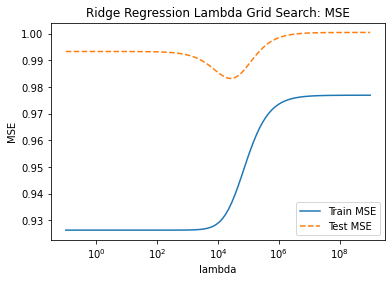

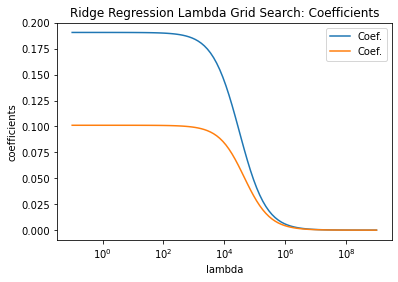

In [156]:
plot_mse_coeff(parsed_model_data, model_type="Ridge")

In [157]:
parsed_model_data

,t1,e_t1,t2,e_t2,t3,e_t3,temperature at 120m (C)1,temperature at 120m (C)2,temperature at 120m (C)3,air pressure at 40m (Pa)1,air pressure at 40m (Pa)2,air pressure at 40m (Pa)3,wind speed at 80m (m/s)1,wind speed at 80m (m/s)2,wind speed at 80m (m/s)3
0,1388534400000000000,61.15,NaN,NaN,NaN,NaN,12.23,NaN,NaN,97370,NaN,NaN,3.76,NaN,NaN
1,1388535300000000000,56.90,NaN,NaN,NaN,NaN,12.13,NaN,NaN,97370,NaN,NaN,3.77,NaN,NaN
2,1388536200000000000,54.70,NaN,NaN,NaN,NaN,12.02,NaN,NaN,97370,NaN,NaN,3.77,NaN,NaN
3,1388537100000000000,51.25,NaN,NaN,NaN,NaN,11.90,NaN,NaN,97380,NaN,NaN,3.74,NaN,NaN
4,1388538000000000000,48.28,NaN,NaN,NaN,NaN,11.76,NaN,NaN,97390,NaN,NaN,3.73,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33235,1418445900000000000,230.09,1.418446e+18,230.09,1.418446e+18,230.09,21.29,21.29,21.29,96880,96880.0,96880.0,2.50,2.50,2.50
33236,1418446800000000000,233.17,1.418447e+18,233.17,1.418447e+18,233.17,21.93,21.93,21.93,96880,96880.0,96880.0,2.82,2.82,2.82
33237,1418447700000000000,231.69,1.418448e+18,231.69,1.418448e+18,231.69,22.38,22.38,22.38,96880,96880.0,96880.0,3.03,3.03,3.03
33238,1418448600000000000,227.42,1.418449e+18,227.42,1.418449e+18,227.42,22.62,22.62,22.62,96880,96880.0,96880.0,3.24,3.24,3.24


Modeling t
(33240, 2)
Modeling temperature at 120m (C)
(33240, 2)
Modeling air pressure at 40m (Pa)
(33240, 2)
Modeling wind speed at 80m (m/s)
(33240, 2)


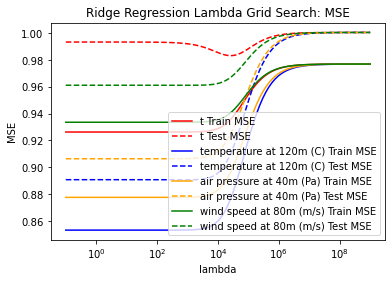

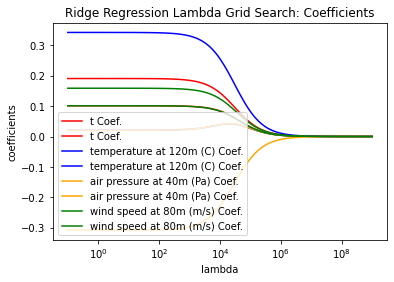

{'lambdas': array([1.00000000e-01, 1.26185688e-01, 1.59228279e-01, 2.00923300e-01,
        2.53536449e-01, 3.19926714e-01, 4.03701726e-01, 5.09413801e-01,
        6.42807312e-01, 8.11130831e-01, 1.02353102e+00, 1.29154967e+00,
        1.62975083e+00, 2.05651231e+00, 2.59502421e+00, 3.27454916e+00,
        4.13201240e+00, 5.21400829e+00, 6.57933225e+00, 8.30217568e+00,
        1.04761575e+01, 1.32194115e+01, 1.66810054e+01, 2.10490414e+01,
        2.65608778e+01, 3.35160265e+01, 4.22924287e+01, 5.33669923e+01,
        6.73415066e+01, 8.49753436e+01, 1.07226722e+02, 1.35304777e+02,
        1.70735265e+02, 2.15443469e+02, 2.71858824e+02, 3.43046929e+02,
        4.32876128e+02, 5.46227722e+02, 6.89261210e+02, 8.69749003e+02,
        1.09749877e+03, 1.38488637e+03, 1.74752840e+03, 2.20513074e+03,
        2.78255940e+03, 3.51119173e+03, 4.43062146e+03, 5.59081018e+03,
        7.05480231e+03, 8.90215085e+03, 1.12332403e+04, 1.41747416e+04,
        1.78864953e+04, 2.25701972e+04, 2.84803587e+0

In [158]:
x_features = ["t", "temperature at 120m (C)", "air pressure at 40m (Pa)", "wind speed at 80m (m/s)"]
plot_mse_coeffs(parsed_model_data, model_type="Ridge", x_features=x_features)

In [159]:
x_features = ["t", "temperature at 120m (C)", "air pressure at 40m (Pa)", "wind speed at 80m (m/s)"]
plot_mse_coeffs(parsed_model_data, model_type="Lasso", x_features=x_features)

Modeling t
(33240, 2)


KeyboardInterrupt: 

After doing the lambda grid search, we see that lambda (the penalty term) must be less than 10^6 because theta coefficients reach 0 at this value, meaning the regression model can no longer fit the data well.

#### Now developing the algorithm:

<img src="alg-regression-pseudo.png" alt="Algorithm" width="400"/>

In [167]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [168]:
def parse_data(data_df, T, x_features=["t"]):
    parse_model_data = pd.DataFrame()

    for x_ft in x_features:
        # past time and wind direction goes from t_initial -> t_final - 2T
        parse_model_data[f"{x_ft}1"] = data_df[x_ft][:-2*T]
        parse_model_data["e_t1"] = data_df[f"wind direction at {meters}m (deg)"][:-2*T]

        # present time and wind direction goes from t_initial + T -> t_final - T
        parse_model_data[f"{x_ft}2"] = data_df[x_ft][T:-T]
        parse_model_data["e_t2"] = data_df[f"wind direction at {meters}m (deg)"][T:-T]

        # future time and wind direction goes from t_0 + 2T -> t_final
        parse_model_data[f"{x_ft}3"] = data_df[x_ft][2*T:]
        parse_model_data["e_t3"] = data_df[f"wind direction at {meters}m (deg)"][2*T:]

    return parse_model_data

In [169]:
# regression to be used in the wind forecasting algorithm
def regression(X, y, T, model_type, lam):
    ''' 
    param X : np.array : training X data
    param y : np.array : training y data
    param T : int : yaw set-point update period
    param model_type : str : type of linear regression (Ridge or Lasso)
    param lam : int : alpha coefficient of regression, a.k.a. penalty term
    '''
    # split X,y data into training and testing datasets
    test_size = 0.3 # test data represents 30% of full dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # standardize training and testing data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    # fit model to training data
    model = Ridge(alpha=lam).fit(X_train, y_train)

    # calculate rsquared,  coefficient of determination
    R2_score = r2_score(y_test, model.predict(X_test))
    
    return model, R2_score

In [173]:
def algorithm(t, wind_dir, T, R_min, model_type, lam):
    '''
    param t : pd.DataFrame : df with columns corresponding to t1 (t1 = t - 2T), t2 (t2 = t - T), and t3 (t3 = t + T)
    param wind_dir : pd.DataFrame : df with columns corresponding to wind direction at t: 
        t1 (t1 = t - 2T), t2 (t2 = t - T), and t3 (t3 = t + T)
    param T : int : the yaw set-point update period
    param R_min : minimum coefficient of determination value R-squared 
        (statistical measure in a regression model that determines the proportion of variance in the dependent variable 
        that can be explained by the independent variable.)
    param model_type : str : type of linear regression (Ridge or Lasso)
    param lam : int : alpha coefficient of regression, a.k.a. penalty term

    returns prediction mean, prediction standard deviation
    '''
    # count of T intervals in time series
    num_T_intervals = int(t.shape[0]/T)

    # lists for storing results
    pred_approaches = list() # either regression or moving avg.
    std_devs = list()
    preds = list()

    # iterate over all yaw set-point periods (T intervals) in time series
    for i in range(num_T_intervals):
        start_t_index = i*T
        end_t_index = (i+1)*T

        # get interval of t1 and wind direction at t1 (np.array format)
        np_t1_interval = t[["t1"]][start_t_index : end_t_index].fillna(0).to_numpy()
        np_e_t1_interval = wind_dir[["e_t1"]][start_t_index : end_t_index].fillna(0).to_numpy()

        # train model2 on t1 and wind_dir at t1
        model_1, R_squared_1 = regression(np_t1_interval, np_e_t1_interval, T, model_type, lam)

        # get interval of t2 and wind direction at t2 (np.array format)
        np_t2_interval = t[["t2"]][start_t_index : end_t_index].fillna(0).to_numpy()
        np_e_t2_interval = wind_dir[["e_t2"]][start_t_index : end_t_index].fillna(0).to_numpy()

        # train model2 on t2 and wind_dir at t2
        model_2, R_squared_2 = regression(np_t2_interval, np_e_t2_interval, T, model_type, lam)

        # calculate mean squared error of model1 predictions at t2 vs raw t2 data
        eps_f = np.mean(np_e_t2_interval - model_1.predict(np_t2_interval)**2)
        
        # calculate mean change in wind direction
        eps_m = np.mean(np_e_t2_interval - np.mean(np_e_t1_interval)**2)

        # initialize model approach indicator
        model_approach = None

        # if prediction results are valid, calculate predictions
        if (eps_f < eps_m) and (R_squared_1 >= R_min) and (R_squared_2 >= R_min):
            # define model approach
            model_approach = "regression"
            # get interval of t3 and wind direction at t3 (np.array format)
            np_t3_interval = t[["t3"]][start_t_index : end_t_index].fillna(0).to_numpy()
            std_dev = np.std(np_e_t2_interval - model_1.predict(np_t2_interval))
            pred = model_2.predict(np_t3_interval)
        
        # if not, calculate moving average
        else:
            # define model approach
            model_approach = "moving average"
            std_dev = np.std(np_t2_interval)
            pred = np.mean(np_e_t2_interval)

        pred_approaches.append(model_approach) # either regression or moving avg.
        std_devs.append(std_dev)
        preds.append(pred)
    
    return pred_approaches, std_devs, preds

In [174]:
def run_algorithm(data_df, T, model_type="Ridge", lam=10**4):
    '''
    param T : int : the yaw set-point update period
    param R_min : minimum coefficient of determination value R-squared 
        (statistical measure in a regression model that determines the proportion of variance in the dependent variable 
        that can be explained by the independent variable.)
    param model_type : str : type of linear regression (Ridge or Lasso)
    param lam : int : alpha coefficient of regression, a.k.a. penalty term
    '''
    # parse model data to have time index and wind direction columns parsed by intervals t1, t2, t3
    parsed_model_data = parse_data(data_df, T, x_features=["t"])

    # divide t inputs and wind_dir outputs
    t = parsed_model_data[["t1", "t2", "t3"]]
    wind_dir = parsed_model_data[["e_t1", "e_t2", "e_t3"]]

    # initial R_min threshold - change this
    R_min = 100

    # get prediction results
    pred_approaches, std_devs, preds = algorithm(t, wind_dir, T, R_min, model_type, lam)
    
    return pred_approaches, std_devs, preds

In [175]:
data_df = pd.read_csv("data/NREL data/all_NREL_india_wind_data_2014.csv")
T = 15*60 
run_algorithm(data_df, T)

(['moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average',
  'moving average'],
 [0.0,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,
  233826714684186.6,